# Perfect plots: Dendrogram
Dendrograms is used to count number of clusters.
Dendrogram works on the distance between point of dataframe.

In [ ]:
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt

## Clinical tests
Source of data: https://www.kaggle.com/saurabh00007/diabetescsv

In [48]:
df = pd.read_csv('c:/1/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.shape

(768, 9)

## <span style="color:blue">Test for attractiveness of women</span>

We have population consist of 768 females in 9 categories. For the first plot we took two variables: 'BMI', 'Age'

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.  https://en.wikipedia.org/wiki/Body_mass_index

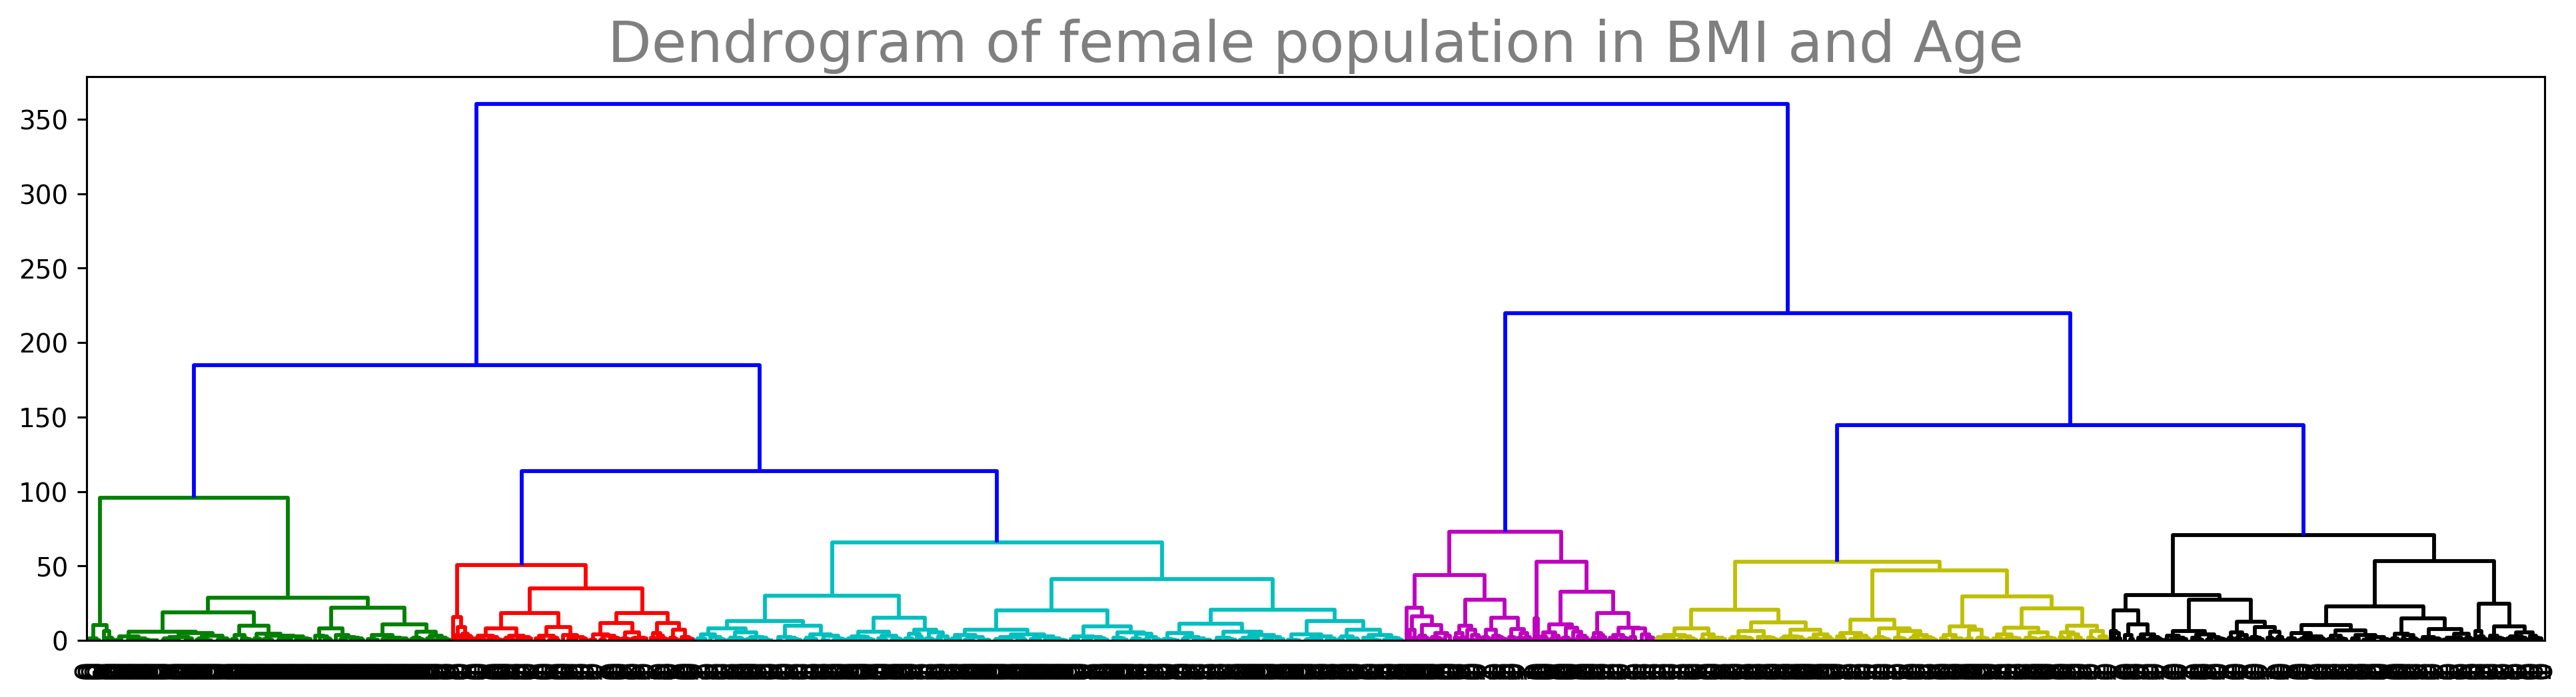

In [58]:
plt.figure(figsize=(17, 4), dpi= 280)  
plt.title("Dendrogram of female population in BMI and Age", fontsize=22, alpha=0.5)  
dend = shc.dendrogram(shc.linkage(df[['BMI', 'Age']], method='ward'), labels=df.Outcome.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

We count last legs of dark blue tree. We have counted 6 branches. We ought to use 6 clusters.

In [26]:
PKP = df[['BMI', 'Age']]
PKP.head()

,BMI,Age
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33


## Clustering population by BMI and Age

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(PKP)

array([1, 4, 4, 3, 1, 4, 3, 3, 2, 2, 3, 3, 2, 2, 2, 4, 5, 4, 1, 4, 3, 1,
       1, 4, 1, 1, 1, 0, 2, 4, 2, 3, 0, 0, 4, 4, 4, 1, 3, 2, 3, 1, 2, 1,
       4, 5, 4, 3, 3, 0, 0, 0, 4, 2, 1, 0, 1, 5, 1, 5, 0, 1, 4, 0, 1, 4,
       4, 1, 0, 3, 3, 3, 1, 3, 3, 0, 1, 3, 5, 0, 0, 0, 4, 0, 1, 3, 1, 3,
       1, 0, 0, 4, 1, 2, 0, 1, 3, 0, 3, 5, 3, 0, 0, 0, 3, 3, 0, 4, 3, 3,
       3, 1, 3, 3, 4, 2, 4, 3, 3, 0, 5, 3, 3, 2, 3, 5, 5, 3, 1, 2, 4, 4,
       3, 1, 0, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 0, 1, 4, 2, 3, 3, 4, 1, 5,
       1, 1, 0, 0, 3, 1, 4, 1, 5, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 5, 4, 4,
       1, 5, 1, 1, 4, 3, 3, 4, 4, 1, 2, 4, 4, 3, 0, 1, 4, 1, 4, 3, 0, 0,
       3, 3, 3, 3, 4, 0, 2, 0, 2, 1, 3, 1, 3, 5, 2, 5, 4, 1, 3, 4, 4, 1,
       3, 2, 4, 2, 0, 3, 3, 3, 3, 5, 5, 1, 0, 3, 3, 5, 1, 5, 4, 0, 3, 3,
       0, 4, 3, 2, 1, 5, 4, 3, 1, 4, 0, 3, 4, 3, 4, 3, 0, 1, 4, 3, 3, 2,
       4, 1, 3, 5, 0, 4, 1, 0, 4, 3, 1, 5, 4, 3, 2, 0, 3, 4, 4, 1, 2, 2,
       3, 5, 0, 3, 3, 3, 5, 5, 2, 3, 4, 3, 1, 2, 3,

We have classes in range from 0 to 5.

Text(0, 0.5, 'Age')

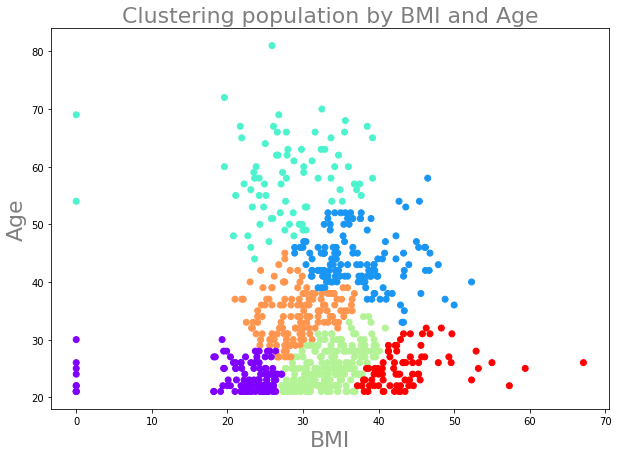

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(PKP['BMI'], PKP['Age'], c=cluster.labels_, cmap='rainbow')
plt.title('Clustering population by BMI and Age', fontsize=22, alpha=0.5)
plt.xlabel('BMI', fontsize=22, alpha=0.5)
plt.ylabel('Age', fontsize=22, alpha=0.5)

Females in cluster red are young and overweight. Patients in violet cluster are young and skinny.

## <span style="color:blue">Test for predisposition to diabetes</span>

'DiabetesPedigreeFunction': level of predisposition to diabetes from the family interview.

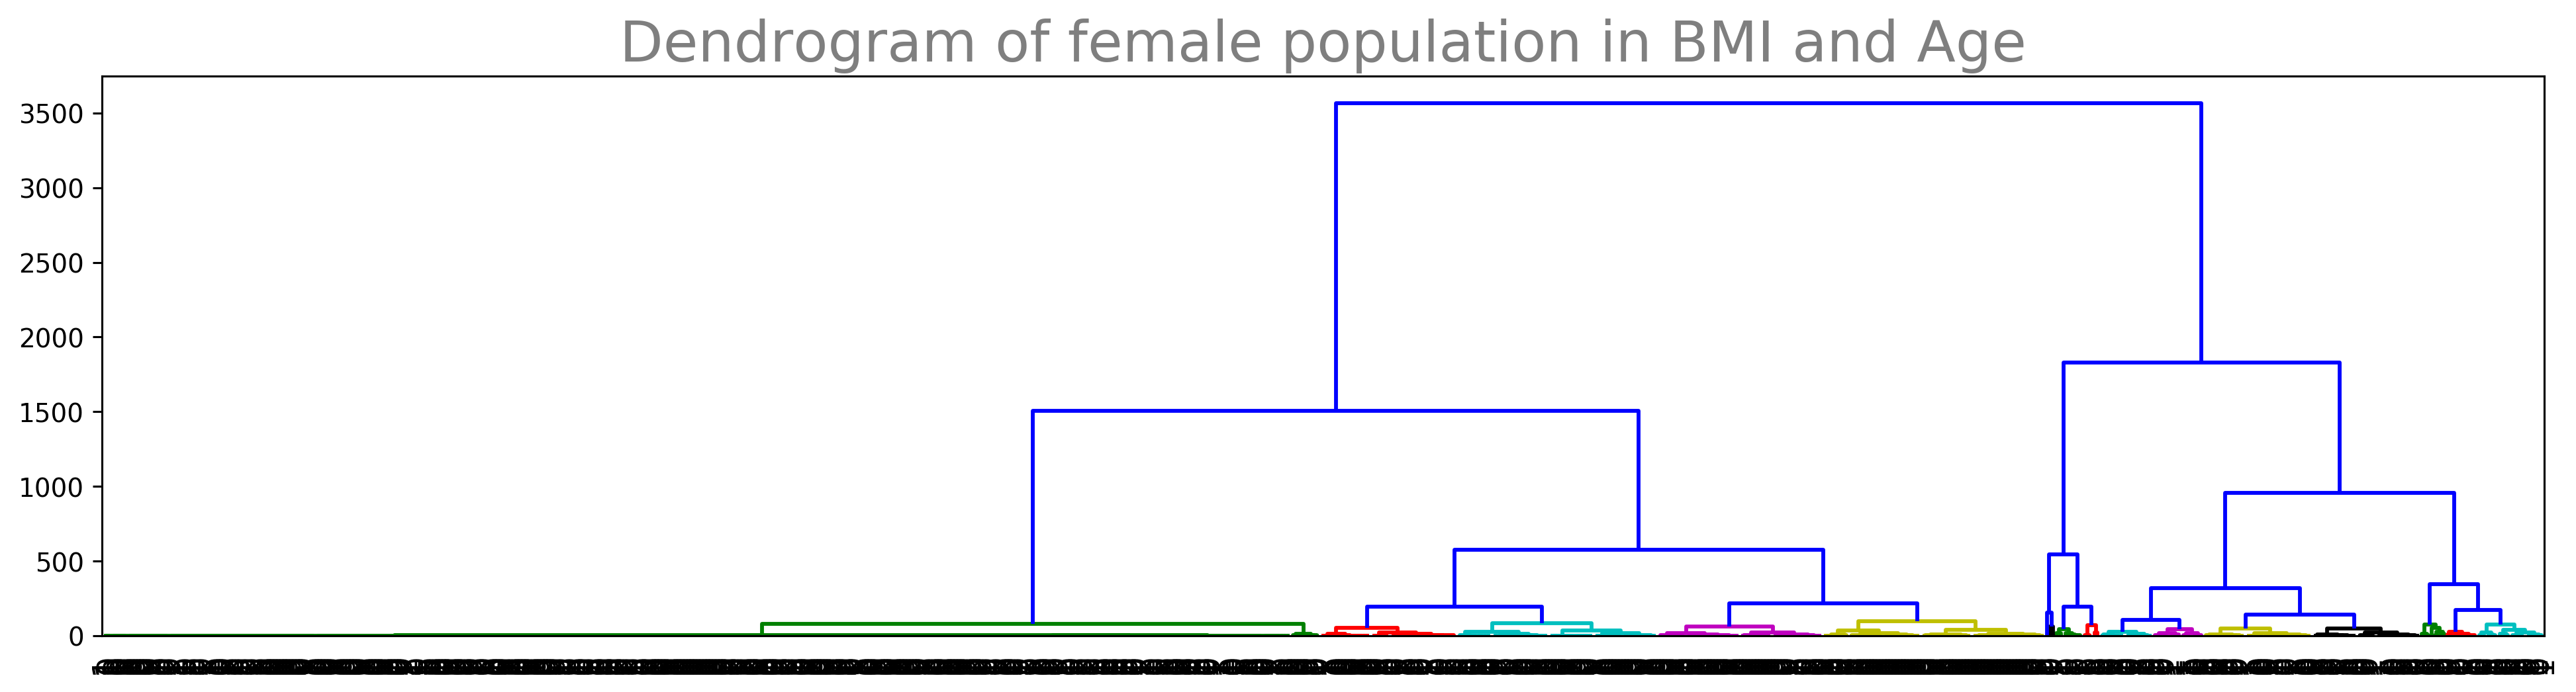

In [63]:
plt.figure(figsize=(17, 4), dpi= 280)  
plt.title("Dendrogram of female population in BMI and Age", fontsize=22, alpha=0.5)  
dend = shc.dendrogram(shc.linkage(df[['DiabetesPedigreeFunction', 'Insulin']], method='ward'), labels=df.Outcome.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

In [62]:
PGK = df[['DiabetesPedigreeFunction', 'Insulin']]

In [61]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(PGK)

array([3, 3, 3, 5, 1, 3, 2, 3, 4, 3, 3, 3, 3, 6, 1, 3, 1, 3, 2, 5, 1, 3,
       3, 3, 5, 5, 3, 5, 5, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 0, 3, 0, 5, 3, 5, 3, 3, 3, 5, 3, 3,
       3, 3, 2, 5, 2, 5, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 5, 3, 2,
       5, 3, 3, 1, 2, 3, 2, 1, 3, 2, 2, 1, 3, 3, 3, 2, 3, 1, 3, 5, 3, 2,
       5, 4, 2, 3, 1, 3, 3, 3, 3, 2, 5, 3, 5, 3, 3, 5, 5, 5, 5, 3, 1, 3,
       1, 3, 2, 5, 2, 2, 3, 0, 3, 3, 2, 3, 0, 3, 3, 5, 3, 3, 1, 3, 1, 4,
       3, 3, 5, 5, 2, 5, 3, 5, 0, 3, 3, 1, 3, 3, 3, 2, 3, 5, 3, 2, 2, 5,
       3, 5, 3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 5, 1, 3, 5, 3, 3, 3, 1, 3, 2,
       5, 0, 3, 3, 3, 2, 1, 3, 0, 3, 2, 3, 3, 3, 3, 5, 1, 0, 5, 5, 3, 3,
       4, 3, 3, 1, 2, 2, 3, 3, 6, 2, 3, 0, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2,
       3, 1, 1, 3, 3, 6, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3, 0, 1, 5, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 5, 3, 0, 3, 5, 1, 3, 3, 5,
       4, 1, 2, 2, 2, 2, 1, 1, 3, 5, 0, 1, 1, 3, 3,

Text(0, 0.5, 'Insulin')

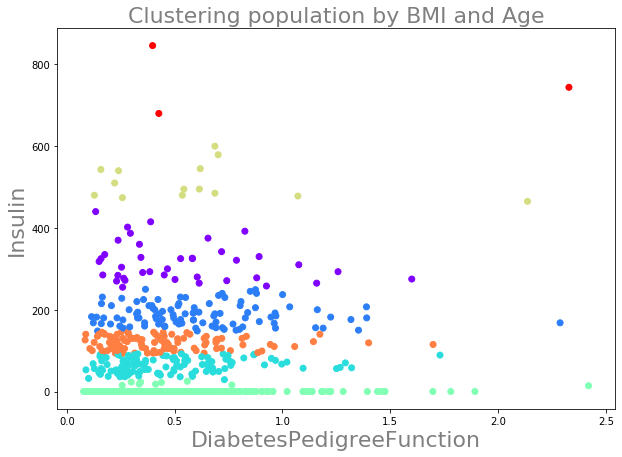

In [66]:
plt.figure(figsize=(10, 7))
plt.scatter(PGK['DiabetesPedigreeFunction'], PGK['Insulin'], c=cluster.labels_, cmap='rainbow')
plt.title('Clustering population by BMI and Age', fontsize=22, alpha=0.5)
plt.xlabel('DiabetesPedigreeFunction', fontsize=22, alpha=0.5)
plt.ylabel('Insulin', fontsize=22, alpha=0.5)